<a href="https://colab.research.google.com/github/LaurenOKane/Customer-Segmentation/blob/main/Unstructured_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download(['punkt', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Kaggle Asda Reviews.csv')

df.head

<bound method NDFrame.head of       firm date_review                          job_title  \
0     ASDA  28/06/2009                      Night Stocker   
1     ASDA  14/09/2009        Night Replenishment Manager   
2     ASDA  19/09/2009                                      
3     ASDA  14/11/2009                            Cashier   
4     ASDA  20/01/2010                            Cleaner   
...    ...         ...                                ...   
4755  ASDA  03/06/2023                         Sales Asid   
4756  ASDA  03/06/2023                    Store Assistant   
4757  ASDA  03/06/2023                Warehouse Operative   
4758  ASDA  04/06/2023                  Checkout Operator   
4759  ASDA  04/06/2023   Checkout Operator/Self Scan Host   

                                  current                         location  \
0                         Former Employee       Brighton, England, England   
1                        Current Employee  Middlesbrough, England, England   
2  

In [3]:
# Creating a 'clean' dataframe without the unrequired columns.
clean_df = df.drop(['firm','job_title', 'current', 'location', 'recommend', 'ceo_approv', 'outlook', 'headline'], axis=1, inplace=False)

clean_df.head()

,date_review,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,pros,cons
0,28/06/2009,3,1.0,NaN,NaN,1.0,3.0,2.0,"easily to get, relatively high pay , consideri...",nihgt time work means very litle of proper lif...
1,14/09/2009,2,3.0,NaN,NaN,3.0,3.0,2.0,asda can be fun if you are left to do your job...,a lack of communication between management res...
2,19/09/2009,3,3.0,NaN,NaN,2.0,3.0,2.0,The colleagues...great bunch of people. Majori...,The managers are fussy and overly interfering....
3,14/11/2009,1,1.0,NaN,NaN,2.0,1.0,1.0,the only good thing about working at ASDA is y...,all i can say is its an unorganised company at...
4,20/01/2010,5,3.0,NaN,NaN,4.0,4.0,4.0,Its a great place to work.,There aren't very many promotion opportunities.


In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_review          4760 non-null   object 
 1   overall_rating       4760 non-null   int64  
 2   work_life_balance    3740 non-null   float64
 3   culture_values       3697 non-null   float64
 4   diversity_inclusion  809 non-null    float64
 5   career_opp           3753 non-null   float64
 6   comp_benefits        3723 non-null   float64
 7   senior_mgmt          3717 non-null   float64
 8   pros                 4760 non-null   object 
 9   cons                 4760 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 372.0+ KB


In [5]:
# Converting the data_review variable from 'object' to 'datetime'.
clean_df['date_review'] = pd.to_datetime(clean_df['date_review'], format='%d/%m/%Y')

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_review          4760 non-null   datetime64[ns]
 1   overall_rating       4760 non-null   int64         
 2   work_life_balance    3740 non-null   float64       
 3   culture_values       3697 non-null   float64       
 4   diversity_inclusion  809 non-null    float64       
 5   career_opp           3753 non-null   float64       
 6   comp_benefits        3723 non-null   float64       
 7   senior_mgmt          3717 non-null   float64       
 8   pros                 4760 non-null   object        
 9   cons                 4760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 372.0+ KB


In [6]:
# Filtering the reviews to 2023 only.
df_2023 = clean_df[clean_df['date_review'].dt.year >= 2023]

df_2023.head()

,date_review,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,pros,cons
3832,2023-01-02,5,NaN,NaN,NaN,NaN,NaN,NaN,Discount flexibility progression weekends fast...,Long hours management uniform parking
3833,2023-01-02,3,2.0,3.0,4.0,3.0,4.0,1.0,Fast paced challenging position great colleagu...,Not allowed to manage and progress your team
3834,2023-01-02,4,3.0,2.0,4.0,2.0,2.0,2.0,Stable pay and hours when you need them,Some managers can be very pressing when they n...
3835,2023-01-03,1,NaN,NaN,NaN,NaN,NaN,NaN,"Money good, most colleagues good to work with","Time pressured, management appalling! No peopl..."
3836,2023-01-03,4,4.0,3.0,5.0,4.0,3.0,4.0,Good management and good co workers,Some customers may get verbally aggressive at ...


In [7]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 3832 to 4759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_review          928 non-null    datetime64[ns]
 1   overall_rating       928 non-null    int64         
 2   work_life_balance    601 non-null    float64       
 3   culture_values       597 non-null    float64       
 4   diversity_inclusion  590 non-null    float64       
 5   career_opp           614 non-null    float64       
 6   comp_benefits        602 non-null    float64       
 7   senior_mgmt          601 non-null    float64       
 8   pros                 928 non-null    object        
 9   cons                 928 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 79.8+ KB


In [8]:
# Replacing the NaN values in the numerical columns with the mean value for that column.
df_2023 = df_2023.apply(lambda col: col.fillna(col.mean())
  if pd.api.types.is_numeric_dtype(col)
  else col)

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 3832 to 4759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_review          928 non-null    datetime64[ns]
 1   overall_rating       928 non-null    int64         
 2   work_life_balance    928 non-null    float64       
 3   culture_values       928 non-null    float64       
 4   diversity_inclusion  928 non-null    float64       
 5   career_opp           928 non-null    float64       
 6   comp_benefits        928 non-null    float64       
 7   senior_mgmt          928 non-null    float64       
 8   pros                 928 non-null    object        
 9   cons                 928 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 79.8+ KB


In [9]:
# Converting the 'float' columns to 'integers'.
columns_to_convert = ['work_life_balance', 'culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt']
df_2023[columns_to_convert] = df_2023[columns_to_convert].astype('int')

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 3832 to 4759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_review          928 non-null    datetime64[ns]
 1   overall_rating       928 non-null    int64         
 2   work_life_balance    928 non-null    int64         
 3   culture_values       928 non-null    int64         
 4   diversity_inclusion  928 non-null    int64         
 5   career_opp           928 non-null    int64         
 6   comp_benefits        928 non-null    int64         
 7   senior_mgmt          928 non-null    int64         
 8   pros                 928 non-null    object        
 9   cons                 928 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 79.8+ KB


In [10]:
# Define stop words and stemmer
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to pros and cons columns
df_2023['pros_tokens'] = df_2023['pros'].apply(preprocess_text)
df_2023['cons_tokens'] = df_2023['cons'].apply(preprocess_text)

df_2023.head()

,date_review,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,pros,cons,pros_tokens,cons_tokens
3832,2023-01-02,5,3,3,3,2,3,2,Discount flexibility progression weekends fast...,Long hours management uniform parking,discount flexibility progression weekends fast...,long hours management uniform parking
3833,2023-01-02,3,2,3,4,3,4,1,Fast paced challenging position great colleagu...,Not allowed to manage and progress your team,fast paced challenging position great colleagu...,allowed manage progress team
3834,2023-01-02,4,3,2,4,2,2,2,Stable pay and hours when you need them,Some managers can be very pressing when they n...,stable pay hours need,managers pressing need get things done includi...
3835,2023-01-03,1,3,3,3,2,3,2,"Money good, most colleagues good to work with","Time pressured, management appalling! No peopl...",money good colleagues good work,time pressured management appalling people ski...
3836,2023-01-03,4,4,3,5,4,3,4,Good management and good co workers,Some customers may get verbally aggressive at ...,good management good co workers,customers may get verbally aggressive times


In [11]:
# Function to apply LDA
def apply_lda(data):
    vectorizer = CountVectorizer()
    dtm = vectorizer.fit_transform(data)

    num_topics = 3  # You can adjust this based on the expected number of topics
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(dtm)

    return lda_model, dtm, vectorizer

# Apply LDA to pros
lda_model_pros, dtm_pros, vectorizer_pros = apply_lda(df_2023['pros_tokens'])

# Apply LDA to cons
lda_model_cons, dtm_cons, vectorizer_cons = apply_lda(df_2023['cons_tokens'])

In [12]:
# Function to extract top 3 topics
def extract_top_topics(lda_model, vectorizer):
    feature_names = vectorizer.get_feature_names_out()

    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_keywords_idx = topic.argsort()[:-3 - 1:-1]
        top_keywords = [feature_names[i] for i in top_keywords_idx]
        topics.append(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")

    return topics

# Extract top 3 topics for pros
top_topics_pros = extract_top_topics(lda_model_pros, vectorizer_pros)
print("Top 3 Topics for Pros:")
for topic in top_topics_pros:
    print(topic)

# Extract top 3 topics for cons
top_topics_cons = extract_top_topics(lda_model_cons, vectorizer_cons)
print("\nTop 3 Topics for Cons:")
for topic in top_topics_cons:
    print(topic)

Top 3 Topics for Pros:
Topic #1: good, pay, hours
Topic #2: great, staff, friendly
Topic #3: work, good, working

Top 3 Topics for Cons:
Topic #1: management, hours, work
Topic #2: bad, customers, none
Topic #3: work, hours, long


In [13]:
numerical_columns = ['overall_rating', 'work_life_balance', 'culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt']
data_for_correlation = df_2023[numerical_columns]

In [14]:
correlation_matrix = data_for_correlation.corr()

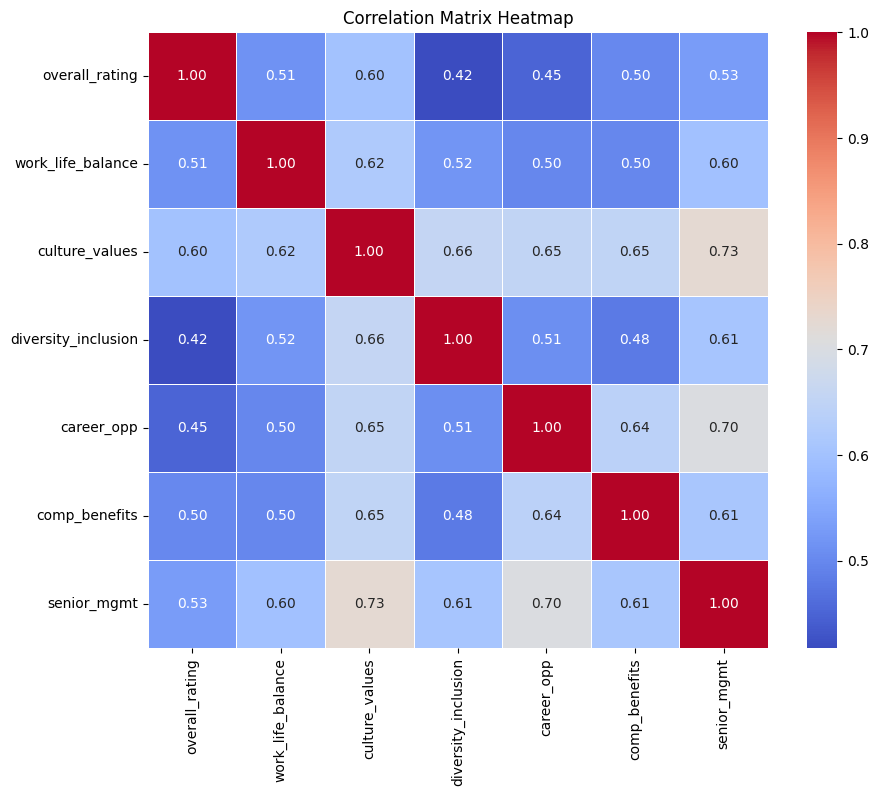

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()